##### Hyperparameter Tuning of Support Vector Machine Using GridSearchCV

Doc :https://medium.com/swlh/hyperparameter-tuning-of-support-vector-machine-using-gridsearchcv-4d17671d1ed2

###### What is SVM?

SVM stands for Support Vector Machine. It is a Supervised Machine Learning algorithm. It is used for both classification and regression problems. It uses a kernel strategy to modify your data and, based on these changes, finds the perfect boundary between the possible results.

Most of the time, we get linear data, but usually, things are not that simple. Let’s take an example of classification with non-linear data:

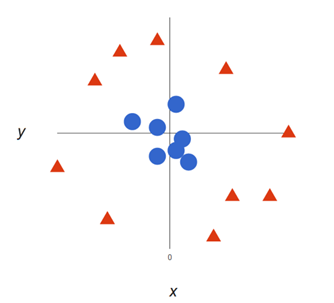

Now, to classify this type of data, we add a third dimension to this two-dimension plot. We rule that it be calculated a certain way convenient for us: z = x² + y² (you’ll notice that’s the equation for a circle). It gives us a three-dimension space. Since we are in three dimensions now, the hyperplane is a plane parallel to the x-axis at a certain z (let’s say z = 1). Now, we convert it again into two dimensions.


It looks like this :

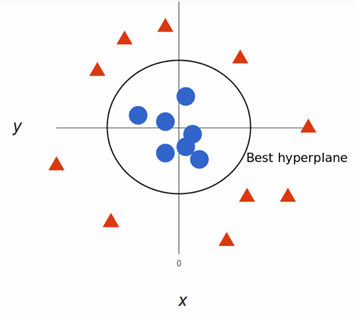

And here we go! Our decision boundary is a circumference of radius 1, which separates both tags using SVM.

##### What is Grid Search?

Grid search is a technique for tuning hyperparameter that may facilitate build a model and evaluate a model for every combination of algorithm parameters per grid.

We might use 10 fold cross-validation to search for the best value for that tuning hyperparameter. Parameters like in decision criterion, max_depth, min_sample_split, etc. These values are called hyperparameters. To get the simplest set of hyperparameters, we will use the Grid Search method. In the Grid Search, all the mixtures of hyperparameters combinations will pass through one by one into the model and check each model's score. It gives us a set of hyperparameters that gives the best score. Scikit-learn package as a means of automatically iterating over these hyperparameters using cross-validation. This method is called Grid Search.


###### How does it work?

Grid Search takes the model or objects you’d prefer to train and different values of the hyperparameters. It then calculates the error for various hyperparameter values, permitting you to choose the best values.

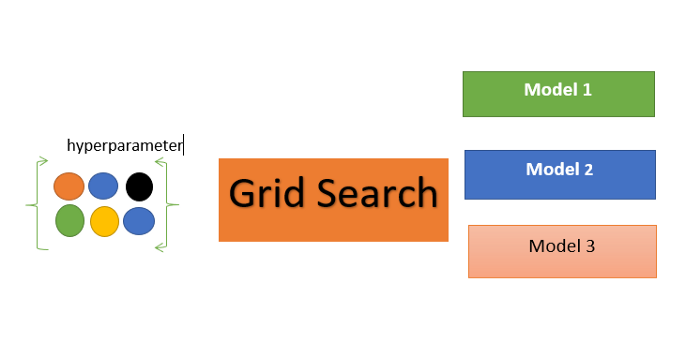

Let the tiny circles represent different hyperparameters. We begin with one value for hyperparameters and train the model. We use different hyperparameters to train the model. We tend to continue the method until we have exhausted the various parameter values. Every model produces an error. We pick the hyperparameter that minimizes the error. We split our dataset into 3 parts to pick the hyperparameter, the training set, validation set, and test set. We tend to train the model for different hyperparameters. We use the error component for each model. We select the hyperparameter that minimizes the error or maximizes the score on the validation set. In ending the test, our model performance using the test data

##### How to implement

In [2]:
# Import packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
# import dataset
from sklearn.datasets import load_wine
wine=load_wine()
df=pd.DataFrame(data=wine['data'], columns=wine['feature_names'])

In [5]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [7]:
X=wine.data
y=wine.target
features=wine.feature_names
print(len(features))

13


To understand every feature's dependency on the output, we use seaborn and matplotlib library for visualization. First, we use a boxplot to know the relation between features and output.

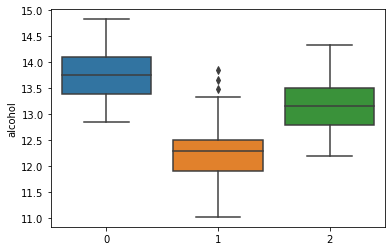

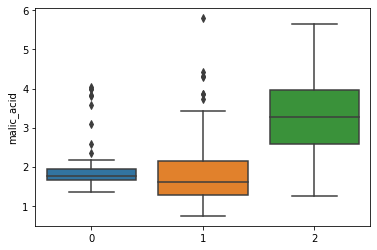

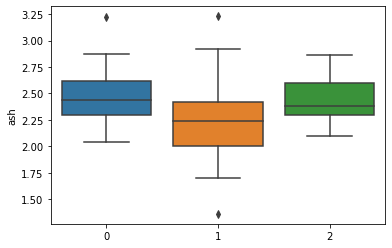

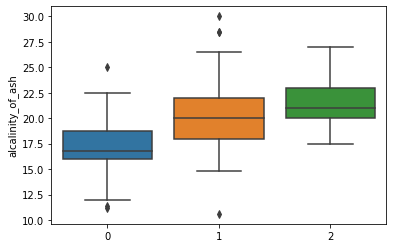

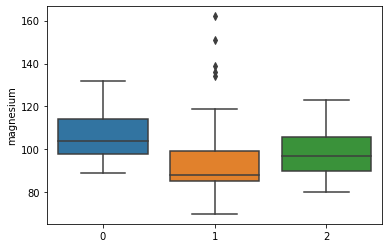

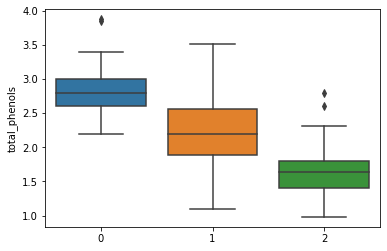

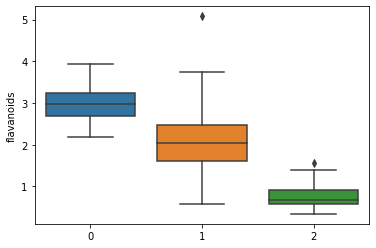

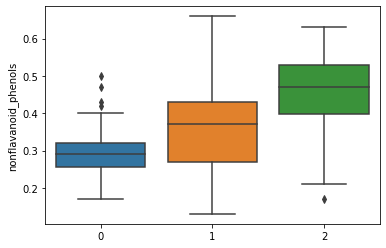

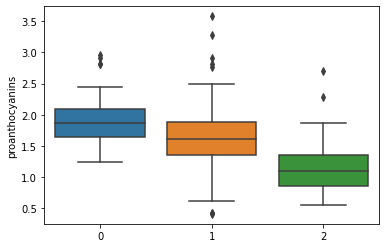

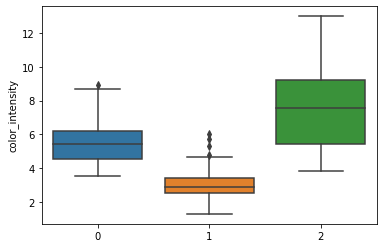

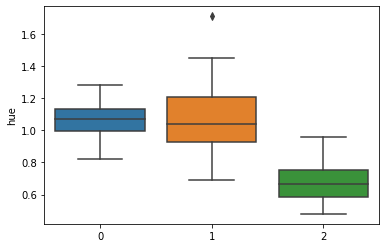

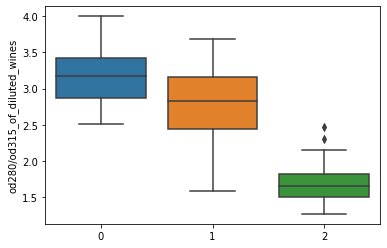

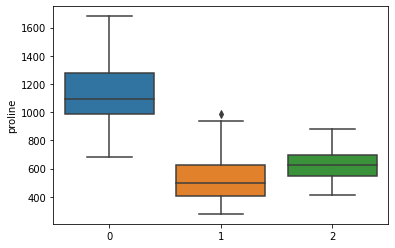

In [8]:
import seaborn as sns 
for i in range(13):
    sns.boxplot(x=y, y=X[:,i])
    plt.ylabel(features[i])
    plt.show()

Let’s take an example of one of the feature:

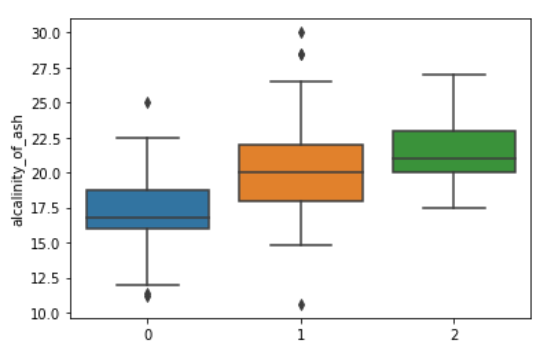

In this boxplot, we easily see a linear relation between alcalinity_of_ash and the wine class.

Another example :

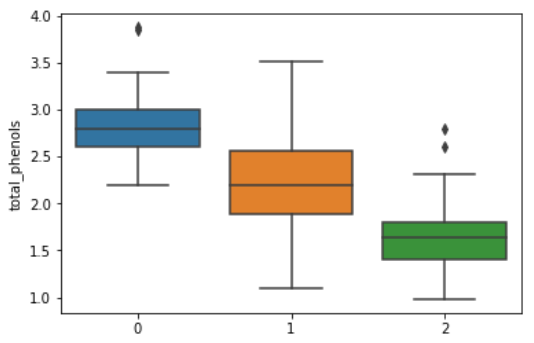

In this boxplot, we see 3 outliers, and if we decrease total_phenols, then the class of wine changes.

So, our SVM model might assign more importance to those features which are varying linearly with the output.

To see how our data is distributed, we use matplotlib python library. We use histogram here. Let’s see an example of it :

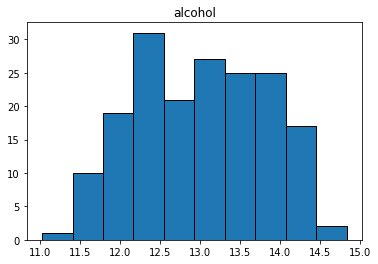

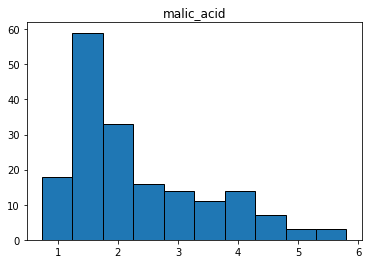

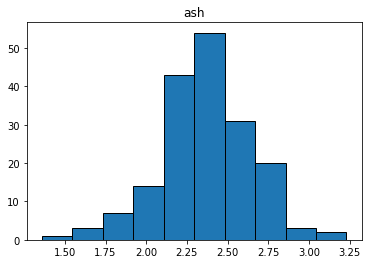

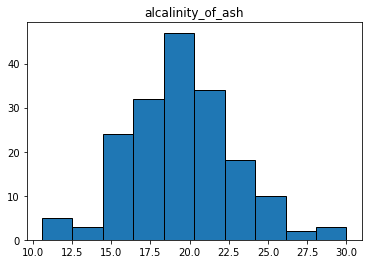

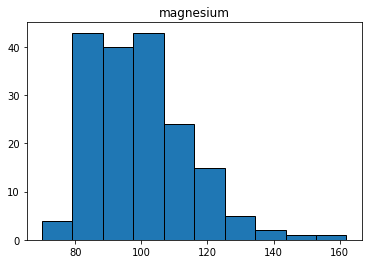

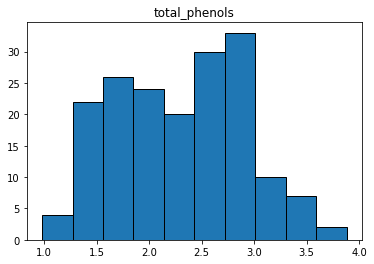

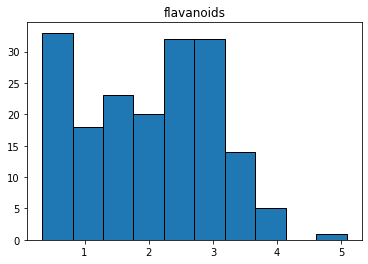

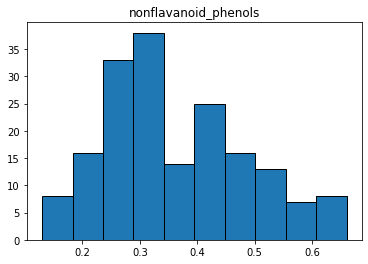

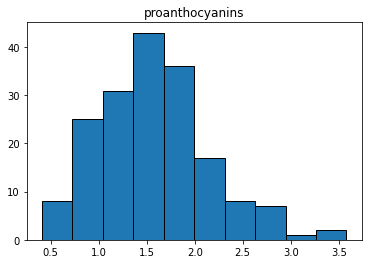

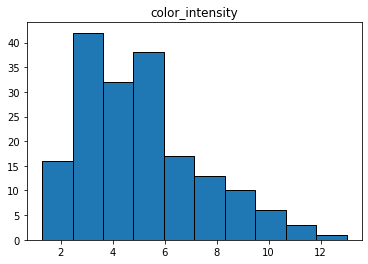

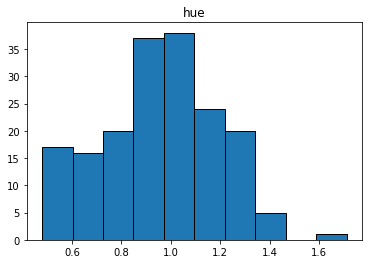

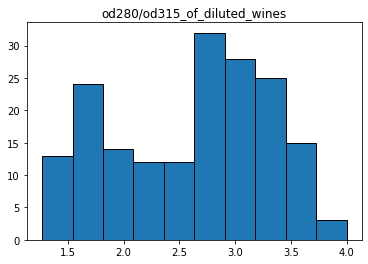

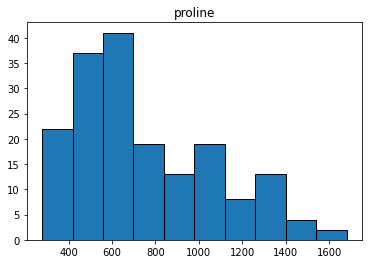

In [9]:
for i in range(13):
  plt.hist(X[:,i],edgecolor='black')
  plt.title(features[i])
  plt.show()

Feature malic_acid follows the left-skewed distribution.

###### Train Test Split:

We split the data into two parts training dataset and testing dataset using the train_test_split module of sklearn’s model_selection package in 70% — 30%, respectively. Because we first train our model using the training dataset and then test our model accuracy using the testing dataset.

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3,
                                                 random_state=32)

###### Train the Support Vector Classifier without Hyperparameter Tuning :

Now, we train our machine learning model. We import Support Vector Classifier (SVC) from sklearn’s SVM package because it is a classification problem.

In [11]:
svm = SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.6296296296296297

###### Parameter for gridsearchcv:

The value of your Grid Search parameter could be a list that contains a Python dictionary. The key is the name of the parameter. The value of the dictionary is the different values of the parameter. This will make a table that can be viewed as various parameter values. We also have an object or model of the support vector classifier. The Grid Search is using various kinds of classification performance metrics on the scoring methods. In this case, classification error and number of folds, the model or object, and the parameter values. Some of the outputs include the different scores for different parameter values. In this case, classification error along with parameter values that have the best score.

Now the main part comes Hyper-parameter Tuning. First, we understand hyper-parameter — it is a parameter whose value is used to control the learning process, and hyper-parameter tuning means choosing optimal parameters.

Parameters are as follows:

- C: It is the regularization parameter, C, of the error term.

- kernel: It specifies the kernel type to be used in the algorithm. It can be ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’, or callable. The default value is ‘rbf’.

- degree: It is the degree of the polynomial kernel function (‘poly’) and is ignored by all other kernels. The default value is 3.

- gamma: It is the kernel coefficient for ‘rbf’, ‘poly’, and ‘sigmoid’. If gamma is ‘auto’, then 1/n_features will be used instead.

To accomplish this task, we use GridSearchCV; it is a library function that is a member of sklearn’s model_selection package. It helps to loop through predefined hyper-parameters and fit your estimator (like-SVC) on our training set. Here is the code:

In [12]:
from sklearn.model_selection import GridSearchCV
param_grid = { 'C':[0.1,1,100,1000],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(SVC(),param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 100, 1000], 'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

###### finding best hyperparameter using gridsearchcv:

We fit the object. We can find the best values for the parameters using the attribute best estimator.

In [13]:
print(grid.best_params_)
print(grid.score(X_test,y_test))

{'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}
0.9259259259259259


To know the accuracy, we use the score() function.

The final output we get with 90% accuracy and by using the SVC model and GridSearchCV.

Conclusion :

We analyzed the Wine Dataset (which is a preloaded dataset included with scikit-learn) in this post. Pandas, Seaborn, and Matplotlib, were used to organize and plot the data, revealing several of the features naturally separated into classes. Classifiers were trained and testing using the split/train/test paradigm. Now that we’ve learned how to work with SVM and how to tune their hyper-parameters.